<p align="right">
    <img src="Zewail-City.png">
</p>


---

# Machine Learning Lab #5 


In [1]:
# import Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
# Logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# SVM
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
import mglearn as mg

/home/hazem/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## EDA

### Load

In [2]:
# Read the Data
df = pd.read_csv("large.csv")

### Initial Data Overview

In [3]:
# Data head
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Target
0,0.596057,1.237233,-1.610645,-0.883238,2.169099,0.265725,0
1,-0.165917,1.183855,-1.274950,-3.879140,0.327336,0.298859,0
2,0.777226,-1.232158,-1.537643,3.186185,-0.877600,-0.130752,1
3,1.827636,1.405838,-0.900624,0.216352,0.729112,0.751226,1
4,-0.280984,3.319092,0.077461,2.798418,4.284949,4.973398,1


In [4]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  5000 non-null   float64
 1   Feature2  5000 non-null   float64
 2   Feature3  5000 non-null   float64
 3   Feature4  5000 non-null   float64
 4   Feature5  5000 non-null   float64
 5   Feature6  5000 non-null   float64
 6   Target    5000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 273.6 KB


In [5]:
# Null counts
print("null counts:")
df.isnull().sum()

null counts:


Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Target      0
dtype: int64

In [6]:
# Data statistical summary
df.describe(include="all")

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.006722,1.982227,-0.990502,0.081358,2.982292,1.999955,0.441000
std,1.195776,1.818787,0.898893,2.315756,1.988943,2.300380,0.496556
min,-3.889521,-5.060320,-4.038021,-3.999615,-4.712751,-1.999956,0.000000
25%,-0.789486,0.764151,-1.594798,-1.892852,1.599365,-0.026602,0.000000
50%,0.016159,1.968589,-0.991074,0.094360,2.991102,2.016688,0.000000
75%,0.799213,3.219029,-0.392019,2.080826,4.337620,3.950512,1.000000
max,4.711485,8.352299,2.086019,3.999208,10.222700,5.998315,1.000000


---

### Visualization

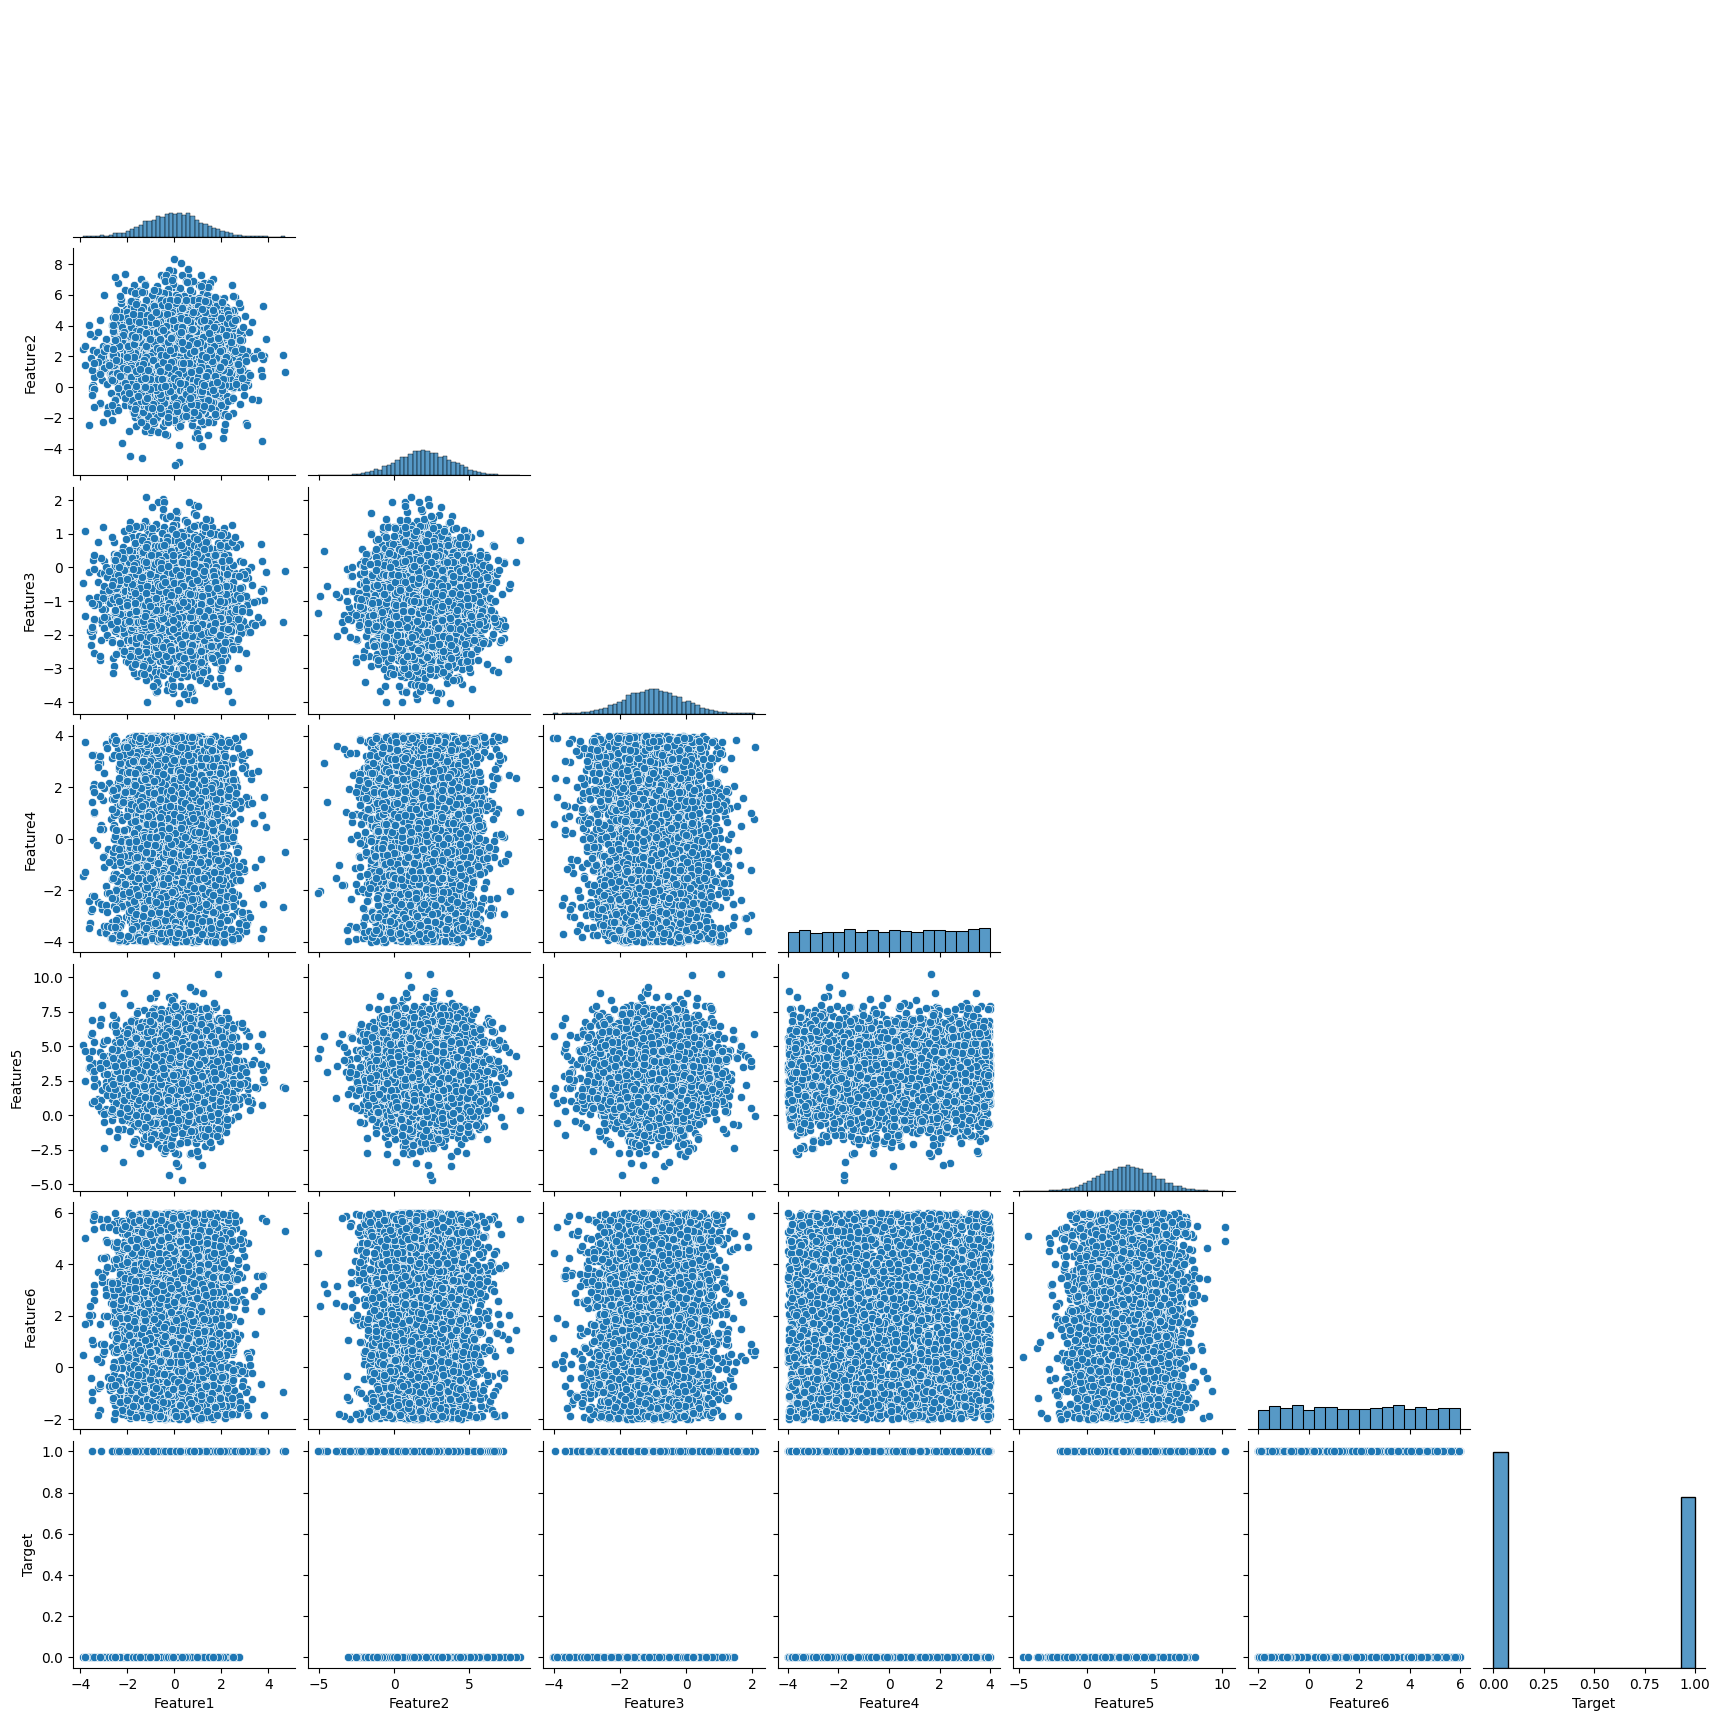

In [7]:
# pairplot
sns.pairplot(df, diag_kind="hist", corner=True)

---

### Outliers Detection and Visualization

<Axes: >

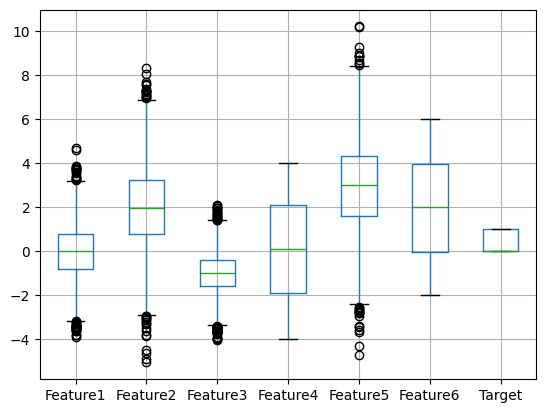

In [8]:
# Boxplot
df.boxplot()

---

### Standardization

In [9]:
# Standardization (Z_score) [SVM, Logistic, KNN, PCA]
df_stand = df.copy()
standardized_data = StandardScaler().fit_transform(df)
df_stand = pd.DataFrame(standardized_data, columns=df_stand.columns, index=df_stand.index)

In [10]:
df_stand.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Target
0,0.492896,-0.409652,-0.689965,-0.416578,-0.408898,-0.753964,-0.888205
1,-0.144389,-0.439003,-0.316473,-1.710411,-1.334992,-0.739559,-0.888205
2,0.644419,-1.767500,-0.608744,1.340874,-1.940870,-0.926334,1.125866
3,1.522941,-0.316940,0.099998,0.058300,-1.132967,-0.542890,1.125866
4,-0.240626,0.735105,1.188206,1.173410,0.655015,1.292717,1.125866


---

### Split Dataset

In [11]:
# Supposing final features and target
X = df_stand.drop('Target', axis=1)  # features
y = df['Target']   # label

In [12]:
# First split: Train + Temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation + Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [13]:
# Print shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (3500, 6)
y_train: (3500,)
X_val: (750, 6)
y_val: (750,)
X_test: (750, 6)
y_test: (750,)


In [14]:
# helper function
def plot_decision_boundaries(models, model_names, X, y, feature_names):
    """
    models: list of trained models
    model_names: list of model names
    X: 2D numpy array (N,2)
    y: target
    feature_names: list/tuple with two names → (name_of_feature1, "Target")
    """
    X = np.asarray(X)
    y = np.asarray(y)

    x_name = feature_names[0]          # actual name from DataFrame
    y_name = feature_names[1]          # usually "Target"

    n = len(models)
    plt.figure(figsize=(6 * n, 5))

    for i, model in enumerate(models):
        plt.subplot(1, n, i + 1)
        mg.plots.plot_2d_separator(model, X, fill=True, eps=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

        plt.title(model_names[i])
        plt.xlabel(x_name)
        plt.ylabel(y_name)

    plt.tight_layout()
    plt.show()


---

## ML

### Logistic Regression

In [15]:
# Initialize and Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_LR = model.predict(X_test)

/home/hazem/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LogisticRegression is expecting 6 features as input.

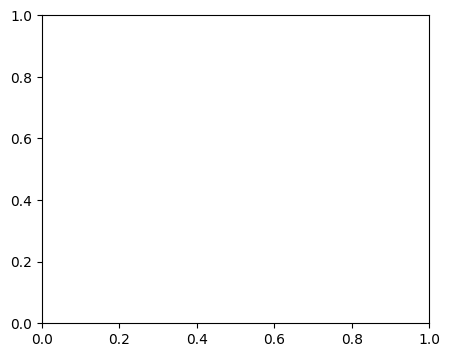

In [16]:
# plot
plot_model(model, X_train, y_train, "Logistic Regression")

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_LR)
print(f"Model Accuracy: {accuracy* 100} %")

In [ ]:
# plot
disp_normalized = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_LR,
    cmap=plt.cm.Blues,
)

disp_normalized.ax_.set_title("Confusion Matrix (%)")
plt.show()

In [ ]:
# Generate and print the classification report
print(classification_report(y_test, y_LR))

---

### SVM

In [ ]:
# Initialize and Train the Model
model = SVC(kernel="linear")
model.fit(X_train, y_train)

# Predict
y_sv = model.predict(X_test)

In [ ]:
# plot
plot_model(model, X_train, y_train, "Linear SVM")

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_sv)
print(f"Model Accuracy: {accuracy* 100} %")

In [ ]:
# plot
disp_normalized = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_sv,
    cmap=plt.cm.Blues,
)

disp_normalized.ax_.set_title("Confusion Matrix (%)")
plt.show()

In [ ]:
# Generate and print the classification report
print(classification_report(y_test, y_sv))

---

### KNNN

In [ ]:
# Initialize and Train the Model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict
y_k = model.predict(X_test)

In [ ]:
# plot
plot_model(model, X_train, y_train, "KNN (3 neighbors)")

In [ ]:
# accuracy
accuracy = accuracy_score(y_test, y_k)
print(f"Model Accuracy: {accuracy* 100} %")

In [ ]:
# plot
disp_normalized = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_k,
    cmap=plt.cm.Blues,
)

disp_normalized.ax_.set_title("Confusion Matrix (%)")
plt.show()

In [ ]:
# Generate and print the classification report
print(classification_report(y_test, y_k))

---